<a href="https://colab.research.google.com/github/dafeng097/info5731/blob/master/word_embedding_lstm_keras_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://github.com/wshuyi/info-5731-public/raw/master/yelp-polarity-middle-size.pickle

--2019-04-09 19:53:31--  https://github.com/wshuyi/info-5731-public/raw/master/yelp-polarity-middle-size.pickle
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wshuyi/info-5731-public/master/yelp-polarity-middle-size.pickle [following]
--2019-04-09 19:53:31--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/yelp-polarity-middle-size.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16174268 (15M) [application/octet-stream]
Saving to: ‘yelp-polarity-middle-size.pickle’

yelp-polarity-middl 100%[===================>]  15.42M  89.4MB/s    in 0.2s    

2019-04-09

In [0]:
import pickle

In [0]:
import pandas as pd

In [0]:
with open("yelp-polarity-middle-size.pickle", 'rb') as f:
  train, valid, test = pickle.load(f)

In [0]:
train.head()

,sentiment,text
0,0,"If you're leaving Vegas, know that this is the..."
1,1,We were hungry and so quick bites of pizzas sa...
2,0,I have been calling around to various bakeries...
3,0,"The first few visits here, we enjoyed it. The ..."
4,0,"Horrible service, menus never provided. Had to..."


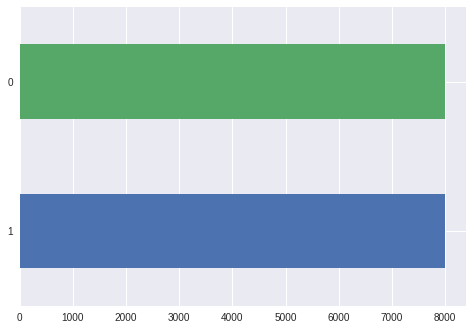

In [0]:
train.sentiment.value_counts().plot(kind='barh')

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
import numpy as np

In [0]:
num_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=num_words)

In [0]:
tokenizer.fit_on_texts(train.text)

In [0]:
train_sequences = tokenizer.texts_to_sequences(train.text)
valid_sequences = tokenizer.texts_to_sequences(valid.text)
test_sequences = tokenizer.texts_to_sequences(test.text)

In [0]:
train.text[0]

"If you're leaving Vegas, know that this is the very last time you will have to shell out an ungodly amount of money for pure crap. \\n\\nWe just wanted a nice refreshing soda with ice and a straw to sooth our yucky tummies. Little did I know that two small sodas would cost $6.25. \\n\\n$6.25!!!!!!!\\n\\nWhat a gigantic rip off. Complete usuary. Eff you, BK."

In [0]:
train_sequences[0]

[40,
 240,
 948,
 137,
 112,
 13,
 16,
 11,
 1,
 44,
 184,
 48,
 20,
 65,
 23,
 4,
 2154,
 36,
 59,
 549,
 7,
 260,
 9,
 2724,
 1149,
 12,
 259,
 39,
 190,
 5,
 89,
 1997,
 1374,
 18,
 457,
 2,
 5,
 3561,
 4,
 42,
 5756,
 111,
 92,
 3,
 112,
 13,
 121,
 201,
 3500,
 53,
 640,
 375,
 686,
 12,
 12,
 375,
 686,
 12,
 1550,
 5,
 4173,
 1998,
 110,
 1040,
 7344,
 20,
 6413]

In [0]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'i'),
 (4, 'to'),
 (5, 'a'),
 (6, 'was'),
 (7, 'of'),
 (8, 'it'),
 (9, 'for'),
 (10, 'in'),
 (11, 'is'),
 (12, 'n'),
 (13, 'that'),
 (14, 'my'),
 (15, 'we'),
 (16, 'this'),
 (17, 'but'),
 (18, 'with'),
 (19, 'they'),
 (20, 'you')]

In [0]:
len(train_sequences[0])

67

In [0]:
len(train_sequences[1])

60

In [0]:
train['text_length']=train['text'].str.len()

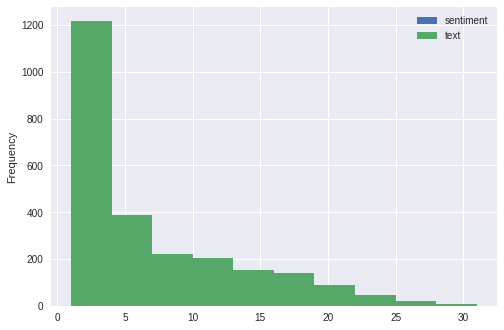

In [0]:
train.groupby(['text_length']).count().plot(kind='hist')

In [0]:
lens = [len(seq) for seq in train_sequences]

In [0]:
lens

[67,
 60,
 139,
 230,
 17,
 207,
 425,
 202,
 88,
 641,
 184,
 83,
 30,
 25,
 39,
 162,
 126,
 203,
 185,
 100,
 123,
 221,
 142,
 169,
 111,
 68,
 71,
 106,
 165,
 204,
 126,
 169,
 45,
 135,
 72,
 27,
 19,
 68,
 111,
 109,
 140,
 46,
 170,
 103,
 14,
 301,
 162,
 56,
 19,
 235,
 385,
 82,
 158,
 177,
 328,
 134,
 42,
 310,
 41,
 63,
 64,
 84,
 192,
 37,
 11,
 5,
 104,
 584,
 285,
 376,
 27,
 59,
 104,
 70,
 137,
 78,
 43,
 144,
 135,
 167,
 101,
 130,
 81,
 183,
 62,
 32,
 32,
 55,
 38,
 78,
 164,
 129,
 32,
 38,
 594,
 97,
 55,
 314,
 141,
 174,
 12,
 107,
 232,
 48,
 190,
 278,
 144,
 42,
 260,
 205,
 127,
 70,
 99,
 131,
 87,
 124,
 64,
 25,
 33,
 358,
 30,
 54,
 122,
 59,
 254,
 147,
 89,
 95,
 134,
 164,
 92,
 228,
 872,
 87,
 22,
 121,
 35,
 335,
 5,
 165,
 70,
 403,
 64,
 156,
 315,
 12,
 106,
 22,
 137,
 239,
 99,
 79,
 109,
 78,
 58,
 113,
 130,
 42,
 146,
 17,
 139,
 455,
 172,
 319,
 49,
 72,
 91,
 71,
 92,
 267,
 124,
 20,
 102,
 81,
 34,
 105,
 270,
 214,
 34,
 214,
 320

In [0]:
import matplotlib.pyplot as plt

(array([8197., 4685., 1779.,  710.,  313.,  142.,   79.,   44.,   29.,
          22.]),
 array([  0. ,  98.7, 197.4, 296.1, 394.8, 493.5, 592.2, 690.9, 789.6,
        888.3, 987. ]),
 <a list of 10 Patch objects>)

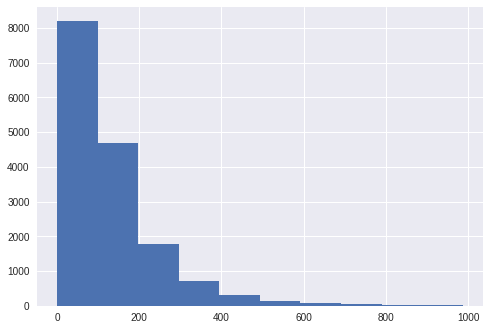

In [0]:
plt.hist(lens)

In [0]:
maxlen = 400

In [0]:
X_train = pad_sequences(train_sequences, maxlen=maxlen)

In [0]:
X_train

array([[   0,    0,    0, ..., 7344,   20, 6413],
       [   0,    0,    0, ..., 1076,    1,  783],
       [   0,    0,    0, ...,  214,   18,   34],
       ...,
       [   0,    0,    0, ...,   48,    7, 4439],
       [   0,    0,    0, ...,   13,   20,   57],
       [   0,    0,    0, ...,  463, 2985,  779]], dtype=int32)

In [0]:
X_train.shape

(16000, 400)

In [0]:
X_valid = pad_sequences(valid_sequences, maxlen=maxlen)
X_test = pad_sequences(test_sequences, maxlen=maxlen)

In [0]:
y_train = train.sentiment
y_valid = valid.sentiment
y_test = test.sentiment

In [0]:
import spacy

In [0]:
spacy.cli.download("en_core_web_lg")


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
nlp = spacy.load("en_core_web_lg")

In [0]:
nlp.vocab["the"].vector

array([ 2.7204e-01, -6.2030e-02, -1.8840e-01,  2.3225e-02, -1.8158e-02,
        6.7192e-03, -1.3877e-01,  1.7708e-01,  1.7709e-01,  2.5882e+00,
       -3.5179e-01, -1.7312e-01,  4.3285e-01, -1.0708e-01,  1.5006e-01,
       -1.9982e-01, -1.9093e-01,  1.1871e+00, -1.6207e-01, -2.3538e-01,
        3.6640e-03, -1.9156e-01, -8.5662e-02,  3.9199e-02, -6.6449e-02,
       -4.2090e-02, -1.9122e-01,  1.1679e-02, -3.7138e-01,  2.1886e-01,
        1.1423e-03,  4.3190e-01, -1.4205e-01,  3.8059e-01,  3.0654e-01,
        2.0167e-02, -1.8316e-01, -6.5186e-03, -8.0549e-03, -1.2063e-01,
        2.7507e-02,  2.9839e-01, -2.2896e-01, -2.2882e-01,  1.4671e-01,
       -7.6301e-02, -1.2680e-01, -6.6651e-03, -5.2795e-02,  1.4258e-01,
        1.5610e-01,  5.5510e-02, -1.6149e-01,  9.6290e-02, -7.6533e-02,
       -4.9971e-02, -1.0195e-02, -4.7641e-02, -1.6679e-01, -2.3940e-01,
        5.0141e-03, -4.9175e-02,  1.3338e-02,  4.1923e-01, -1.0104e-01,
        1.5111e-02, -7.7706e-02, -1.3471e-01,  1.1900e-01,  1.08

(array([  3.,   9., 140., 133.,  13.,   0.,   1.,   0.,   0.,   1.]),
 array([-1.12409997, -0.75286996, -0.38163996, -0.01040995,  0.36082006,
         0.73205006,  1.10328007,  1.47451007,  1.84574008,  2.21697009,
         2.58820009]),
 <a list of 10 Patch objects>)

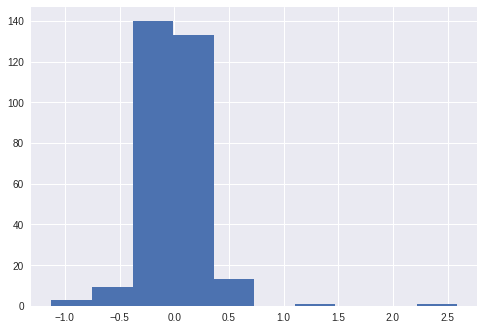

In [0]:
plt.hist(nlp.vocab["the"].vector)

In [0]:
embedding_dim = nlp.vocab.vectors_length

In [0]:
embedding_dim

300

In [0]:
nlp.vocab["you're"].vector

In [0]:
list(tokenizer.index_word.items())[:20]

[(1, 'the'),
 (2, 'and'),
 (3, 'i'),
 (4, 'to'),
 (5, 'a'),
 (6, 'was'),
 (7, 'of'),
 (8, 'it'),
 (9, 'for'),
 (10, 'in'),
 (11, 'is'),
 (12, 'n'),
 (13, 'that'),
 (14, 'my'),
 (15, 'we'),
 (16, 'this'),
 (17, 'but'),
 (18, 'with'),
 (19, 'they'),
 (20, 'you')]

In [0]:
list(tokenizer.index_word.items())[9950:10000]

[(9951, 'hostile'),
 (9952, 'salvage'),
 (9953, '41'),
 (9954, 'appliance'),
 (9955, 'critics'),
 (9956, 'curtain'),
 (9957, 'unimpressive'),
 (9958, 'unfair'),
 (9959, 'misery'),
 (9960, 'strolling'),
 (9961, 'oral'),
 (9962, 'deduct'),
 (9963, 'smattering'),
 (9964, 'daylight'),
 (9965, 'famished'),
 (9966, 'yorker'),
 (9967, "sally's"),
 (9968, 'understandably'),
 (9969, 'livingsocial'),
 (9970, 'elaborate'),
 (9971, 'cruiser'),
 (9972, 'collard'),
 (9973, 'carmel'),
 (9974, 'engineering'),
 (9975, 'nsushi'),
 (9976, 'blessed'),
 (9977, 'rewarded'),
 (9978, 'firehouse'),
 (9979, 'fitted'),
 (9980, 'underwear'),
 (9981, 'vacuuming'),
 (9982, "danny's"),
 (9983, "joey's"),
 (9984, 'npad'),
 (9985, 'lurking'),
 (9986, 'lana'),
 (9987, 'existant'),
 (9988, 'n1st'),
 (9989, 'n2nd'),
 (9990, 'pencil'),
 (9991, 'rust'),
 (9992, 'dreaded'),
 (9993, 'cultures'),
 (9994, 'wiping'),
 (9995, 'sundaes'),
 (9996, 'fur'),
 (9997, 'pureed'),
 (9998, 'stretched'),
 (9999, 'conveyor'),
 (10000, 'wrig

In [0]:
nlp.vocab['n1st'].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [0]:
embedding_matrix = np.random.rand(num_words + 1, embedding_dim)

In [0]:
embedding_matrix.shape

(10001, 300)

(array([31., 28., 35., 37., 22., 27., 32., 29., 27., 32.]),
 array([7.00458302e-04, 1.00216327e-01, 1.99732195e-01, 2.99248064e-01,
        3.98763933e-01, 4.98279801e-01, 5.97795670e-01, 6.97311538e-01,
        7.96827407e-01, 8.96343275e-01, 9.95859144e-01]),
 <a list of 10 Patch objects>)

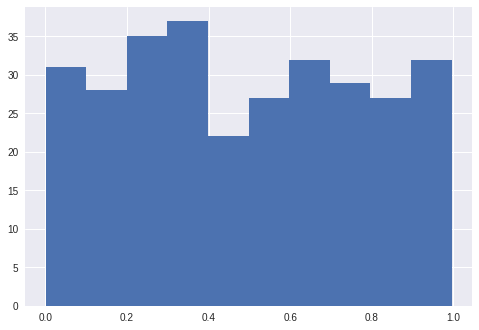

In [0]:
plt.hist(embedding_matrix[0])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 4

(array([31., 28., 35., 37., 22., 27., 32., 29., 27., 32.]),
 array([-1.99719817, -1.59913469, -1.20107122, -0.80300774, -0.40494427,
        -0.0068808 ,  0.39118268,  0.78924615,  1.18730963,  1.5853731 ,
         1.98343658]),
 <a list of 10 Patch objects>)

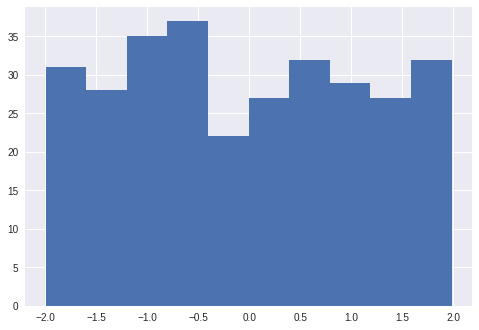

In [0]:
plt.hist(embedding_matrix[0])

In [0]:
for word, i in list(tokenizer.word_index.items())[:num_words]:
  try:
    embedding_vector = nlp.vocab[word].vector
    embedding_matrix[i] = embedding_vector
  except:
    pass


In [0]:
embedding_matrix[:10]

array([[ 1.54153601e+00, -1.08534757e+00, -2.49630875e-02, ...,
         9.07328308e-01,  5.81137253e-01, -4.22590188e-01],
       [ 2.72040009e-01, -6.20299987e-02, -1.88400000e-01, ...,
         1.30150005e-01, -1.83170006e-01,  1.32300004e-01],
       [-1.85670003e-01,  6.60080016e-02, -2.52090007e-01, ...,
        -2.34520007e-02,  1.23020001e-01,  3.31200004e-01],
       ...,
       [ 6.02159984e-02,  2.17989996e-01, -4.24900018e-02, ...,
         1.17090002e-01, -1.66920006e-01, -9.40850005e-02],
       [ 1.36290002e-03,  3.56530011e-01, -5.54970019e-02, ...,
        -1.12369999e-01,  7.82589987e-02,  2.23979995e-01],
       [-1.72240004e-01,  1.82339996e-01, -2.78470010e-01, ...,
        -1.26680002e-01, -4.38560009e-01,  3.87650013e-01]])

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Embedding, Flatten, Dense, LSTM

In [0]:
units = 32

In [0]:
model = Sequential()

In [0]:
model.add(Embedding(num_words + 1, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000300   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,042,957
Trainable params: 3,042,957
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])

In [0]:
model.layers[0].trainable = False

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [0]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data = (X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 159s 10ms/step - loss: 0.4380 - acc: 0.8032 - val_loss: 0.3353 - val_acc: 0.8658
Epoch 2/10
16000/16000 [==============================] - 159s 10ms/step - loss: 0.3162 - acc: 0.8724 - val_loss: 0.2849 - val_acc: 0.8865
Epoch 3/10
16000/16000 [==============================] - 156s 10ms/step - loss: 0.2594 - acc: 0.8945 - val_loss: 0.2573 - val_acc: 0.8968
Epoch 4/10
16000/16000 [==============================] - 160s 10ms/step - loss: 0.2216 - acc: 0.9122 - val_loss: 0.2406 - val_acc: 0.9038
Epoch 5/10
16000/16000 [==============================] - 154s 10ms/step - loss: 0.1959 - acc: 0.9209 - val_loss: 0.2400 - val_acc: 0.9020
Epoch 6/10
16000/16000 [==============================] - 153s 10ms/step - loss: 0.1753 - acc: 0.9296 - val_loss: 0.2299 - val_acc: 0.9075
Epoch 7/10
16000/16000 [==============================] - 151s 9ms/st